<a href="https://colab.research.google.com/github/shanali15/FacialRecognitionSecuritySystemRaspberryPi/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as wen
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
# from keras.models import LSTM
from keras.layers import Dense,LSTM,Embedding
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/BTCUSDT-1m-data.csv')

In [3]:
data.shape

(1761986, 12)

In [37]:
data.

TypeError: ignored

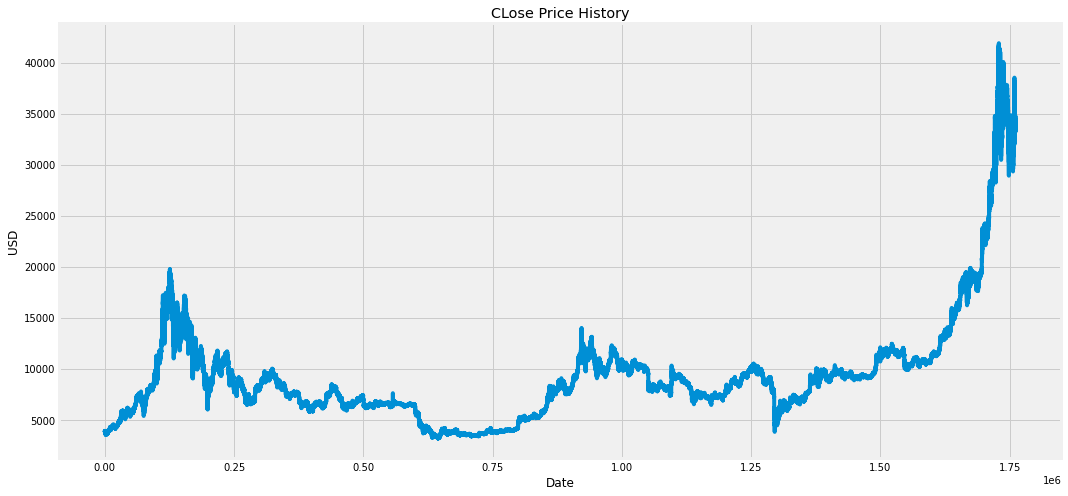

In [4]:
plt.figure(figsize=(16,8))
plt.title('CLose Price History')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

In [5]:
data = data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1409589

In [6]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01916317],
       [0.01916317],
       [0.01916317],
       ...,
       [0.78113644],
       [0.78151592],
       [0.78187474]])

In [7]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01916317, 0.01916317, 0.01916317, 0.01913451, 0.01913451,
       0.01913451, 0.01926101, 0.01916369, 0.01916343, 0.01930618,
       0.01930618, 0.01916317, 0.01930618, 0.01871709, 0.01871709,
       0.01871709, 0.01871709, 0.01871709, 0.01871709, 0.01880434,
       0.01880434, 0.01880434, 0.01927314, 0.01907721, 0.01916317,
       0.01930644, 0.01942132, 0.01872122, 0.01928708, 0.01928708,
       0.01875142, 0.01875142, 0.01875142, 0.01928605, 0.01928605,
       0.01872586, 0.01928579, 0.01928579, 0.01872586, 0.01915697,
       0.01890502, 0.01854361, 0.0183562 , 0.0183562 , 0.0183562 ,
       0.01833012, 0.01833012, 0.01833012, 0.01813057, 0.01787242,
       0.01747926, 0.01747926, 0.01728281, 0.01701098, 0.01703705,
       0.01723893, 0.01723893, 0.01722163, 0.01722163, 0.01735613])]
[0.017934121943871714]



In [8]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
#reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1409529, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1) ))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1409529/1409529 [==============================] - 8721s 6ms/step - loss: 5.2361e-06


In [17]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test =  dataset[training_data_len:, :]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))

In [20]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [26]:
#get RMSE
rmse =np.sqrt(np.mean(((prediction- y_test)**2)))

In [27]:
rmse

625.2248700586879

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


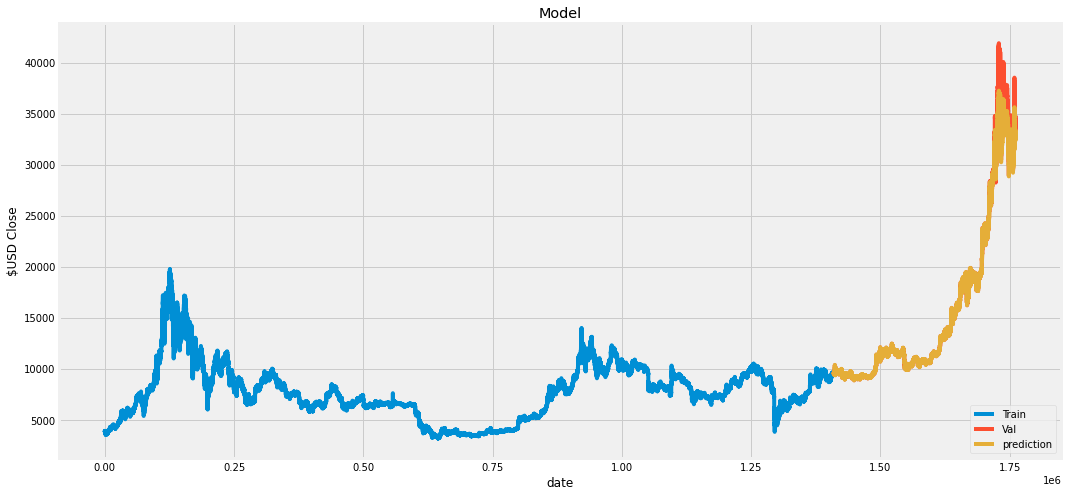

In [34]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date')
plt.ylabel('$USD Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Val','prediction'],loc='lower right')
plt.show()

In [39]:
model = Sequential()

In [40]:
model.summary()

ValueError: ignored